In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['pgf.texsystem'] = 'pdflatex'

In [3]:
def make_subplots(rows, cols):
    fig = plt.gcf()
    subplots = (fig.add_subplot(rows, cols, i) for i in range(1, rows*cols+1))
    return tuple(subplots)

In [4]:
peaks = pd.read_csv('peaks.csv')
peaks.head()

,Init_station,Init_time,Time,Value,Total
0,0.0,3.0,88.500000,451889.241483,4.591581e+06
1,0.0,99.0,88.500000,451451.569448,4.591371e+06
2,0.0,123.0,88.500000,451509.188653,4.591391e+06
3,1.0,3.0,95.541667,447837.229968,4.588649e+06
4,1.0,99.0,95.583333,447733.660271,4.588568e+06


In [5]:
connectivity = pd.read_csv('connectivity.csv').sort_values('Station').reset_index().drop(columns='index')
connectivity.head()

,Station,Local authority,connectivity
0,Acton Central,Ealing,1.001414
1,Acton Main Line,Ealing,1.000086
2,Acton Town,Ealing,1.012185
3,Aldgate,City of London,1.118743
4,Aldgate East,Tower Hamlets,1.026994


In [6]:
from simulate import get_pop_data
pop_data = get_pop_data()[0]

In [7]:
data = peaks.merge(connectivity, how='left', left_on='Init_station',
                   right_index=True).merge(pop_data, how='left')
data_no_outliers = data[data['Station'] != 'New Cross']

array([6., 4.])

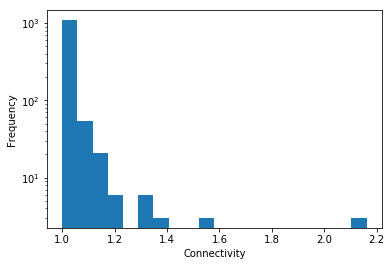

In [11]:
ax = data['connectivity'].plot.hist(bins=20, log=True)
plt.xlabel('Connectivity')
ax.set_yscale('log', nonposy='clip')
plt.gcf().get_size_inches()
# plt.savefig('../../diss/connectivityHist.pgf')

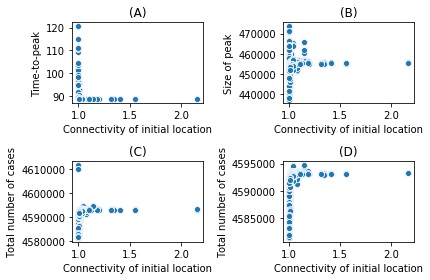

In [19]:
fig = plt.gcf()

ax1 = fig.add_subplot(221)
sns.scatterplot(data=data_no_outliers,
                x='connectivity', y='Time', ax=ax1,
               rasterized=True)
ax1.set_ylabel('Time-to-peak')
ax1.set_title('(A)')
# ax1.axhline(88.25)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=data_no_outliers,
                x='connectivity', y='Value', ax=ax2,
               rasterized=True)
ax2.set_ylabel('Size of peak')
ax2.set_title('(B)')
# ax2.axhline(data_no_outliers['Value'].mean()) # Pure SIR value

ax3 = fig.add_subplot(223)
sns.scatterplot(data=data_no_outliers,
                x='connectivity', y='Total', ax=ax3,
               rasterized=True)
ax3.set_ylabel('Total number of cases')
ax3.set_title('(C)')
# ax3.axhline(4631637)

ax4 = fig.add_subplot(224)
D_data = data_no_outliers[(data_no_outliers['Total'] < 4.6e6)]
sns.scatterplot(data=D_data,
                x='connectivity', y='Total', ax=ax4,
               rasterized=True)
ax4.set_ylabel('Total number of cases')
ax4.set_title('(D)')
# ax3.axhline(4631637)

for ax in fig.get_axes():
    ax.set_xlabel('Connectivity of initial location')


plt.tight_layout()
# plt.gcf().get_size_inches()
# plt.savefig('../../diss/connectivityRelations.pgf', dpi=400)

In [21]:
import scipy
scipy.stats.ttest_ind(data_no_outliers['Total'],
                      data_no_outliers[data_no_outliers['connectivity'] > 1.01]['Total'])

Ttest_indResult(statistic=-11.983370549454133, pvalue=7.629069089020346e-32)